In [21]:
import pandas as pd

In [22]:
df1 = pd.read_csv('to_analyze1.csv')
df34 = pd.read_csv('to_analyze34.csv')
df50 = pd.read_csv('to_analyze50.csv')

In [23]:
df1

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min,is_billboard,label
0,0.1450,2020,0.4010,0.731,0.5730,1,0.000052,0.1130,-10.059,0,...,0,0,0,0,0,0,0,3.418167,False,1
1,0.7560,2020,0.2210,0.700,0.7220,1,0.000000,0.2720,-3.558,0,...,0,0,1,0,0,0,0,2.342100,False,1
2,0.7370,2020,0.0112,0.746,0.7650,0,0.000000,0.0936,-4.410,0,...,0,1,0,0,0,0,0,3.317567,False,1
3,0.3570,2020,0.0194,0.935,0.4540,1,0.000000,0.0824,-7.509,1,...,0,0,0,0,0,0,0,3.125683,False,1
4,0.6820,2020,0.4680,0.737,0.8020,1,0.000000,0.0931,-4.771,1,...,0,0,0,0,0,0,0,2.872083,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.0696,1945,0.9920,0.224,0.0082,0,0.865000,0.0979,-31.113,1,...,0,1,0,0,0,0,0,1.690450,False,0
170649,0.4910,1945,0.1530,0.700,0.1760,1,0.000036,0.1050,-19.316,1,...,0,0,0,0,0,0,0,1.915000,False,0
170650,0.4440,1945,0.9770,0.517,0.2540,0,0.000189,0.2740,-9.750,1,...,0,0,0,0,0,0,0,2.848500,False,0
170651,0.6120,1945,0.1610,0.699,0.2380,1,0.000000,0.1070,-20.042,0,...,1,0,0,0,0,0,0,1.762967,False,0


In [38]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Convert 'release_date' feature to float
#df1['release_date'] = pd.to_numeric(df1['release_date'], errors='coerce')

#Fill missing values with the mean of the column
#df1['release_date'].fillna(df1['release_date'].mean(), inplace=True)

#Separate the features and the target variable
X = df1.drop('label', axis=1)
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X, y)

# Retrieve the feature importances
importance_scores = rf_model.feature_importances_

# Print the importance scores for each feature
for feature, score in zip(X.columns, importance_scores):
    print(f'{feature}: {score}')

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the top 5 most important features
print("\nTop 5 Most Important Features:")
print(importance_df.head(5))

# Print the 5 least important features
print("\n5 Least Important Features:")
print(importance_df.tail(5))



valence: 0.024938217730691846
year: 0.32229603690041847
acousticness: 0.0378942279424416
danceability: 0.03144516438460657
energy: 0.028568700127551087
explicit: 0.01288793630201002
instrumentalness: 0.02822011643688207
liveness: 0.024938188347361653
loudness: 0.032246039594622945
mode: 0.002339089045937257
speechiness: 0.03627751553144776
tempo: 0.025727803234569347
release_year: 0.3344922720990221
key_1: 0.0016707698061905836
key_2: 0.0017261381009664493
key_3: 0.001991766095990702
key_4: 0.001604443063553201
key_5: 0.0019499917299543221
key_6: 0.0013729538706778763
key_7: 0.0022040982988433197
key_8: 0.0018639466560400858
key_9: 0.0018748122926068147
key_10: 0.00193253827690398
key_11: 0.0013591313642399236
duration_min: 0.03816845964083985
is_billboard: 9.643125630201467e-06

Top 5 Most Important Features:
         Feature  Importance
12  release_year    0.334492
1           year    0.322296
24  duration_min    0.038168
2   acousticness    0.037894
10   speechiness    0.036278

5 L

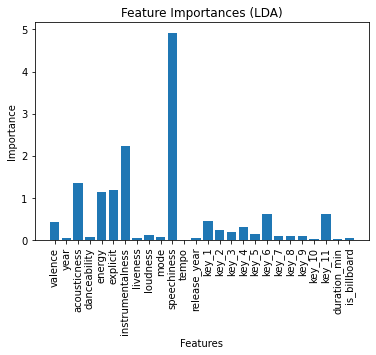

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate the features and the target variable
X = df1.drop('label', axis=1)
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the data
lda.fit(X, y)

# Retrieve the coefficients (feature importances)
importance = np.abs(lda.coef_[0])

# Get the feature names
feature_names = X.columns

# Plot the feature importances
plt.bar(height=importance, x=feature_names)
plt.title("Feature Importances (LDA)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


[0.         0.0080173  0.03196261 0.         0.         0.08742235
 0.08242873 0.         0.00233107 0.         0.12313837 0.00037573
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00076312 0.        ]


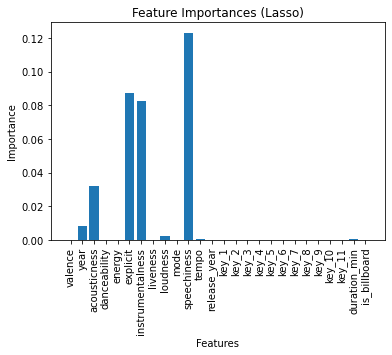

In [40]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Separate the features and the target variable
X = df1.drop('label', axis=1)
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LassoCV container
lasso = LassoCV()
lasso.fit(X_train, y_train)

# Get mnportance scores (coeffiecients)
importance = np.abs(lasso.coef_)
print(importance)

# Select all features
feature_names = X.columns

# Plot the feature importances
plt.bar(height=importance, x=feature_names)
plt.title("Feature Importances (Lasso)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


In [14]:
df34

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min,is_billboard,label
0,0.1450,2020,0.4010,0.731,0.5730,1,0.000052,0.1130,-10.059,0,...,0,0,0,0,0,0,0,3.418167,False,1
1,0.7560,2020,0.2210,0.700,0.7220,1,0.000000,0.2720,-3.558,0,...,0,0,1,0,0,0,0,2.342100,False,1
2,0.7370,2020,0.0112,0.746,0.7650,0,0.000000,0.0936,-4.410,0,...,0,1,0,0,0,0,0,3.317567,False,1
3,0.3570,2020,0.0194,0.935,0.4540,1,0.000000,0.0824,-7.509,1,...,0,0,0,0,0,0,0,3.125683,False,1
4,0.6820,2020,0.4680,0.737,0.8020,1,0.000000,0.0931,-4.771,1,...,0,0,0,0,0,0,0,2.872083,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.0696,1945,0.9920,0.224,0.0082,0,0.865000,0.0979,-31.113,1,...,0,1,0,0,0,0,0,1.690450,False,0
170649,0.4910,1945,0.1530,0.700,0.1760,1,0.000036,0.1050,-19.316,1,...,0,0,0,0,0,0,0,1.915000,False,0
170650,0.4440,1945,0.9770,0.517,0.2540,0,0.000189,0.2740,-9.750,1,...,0,0,0,0,0,0,0,2.848500,False,0
170651,0.6120,1945,0.1610,0.699,0.2380,1,0.000000,0.1070,-20.042,0,...,1,0,0,0,0,0,0,1.762967,False,0


In [41]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Convert 'release_date' feature to float
#df34['release_date'] = pd.to_numeric(df1['release_date'], errors='coerce')

# Fill missing values with the mean of the column
#df34['release_date'].fillna(df1['release_date'].mean(), inplace=True)

# Separate the features and the target variable
X = df34.drop('label', axis=1)
y = df34['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X, y)

# Retrieve the feature importances
importance_scores = rf_model.feature_importances_

# Print the importance scores for each feature
for feature, score in zip(X.columns, importance_scores):
    print(f'{feature}: {score}')

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the top 5 most important features
print("\nTop 5 Most Important Features:")
print(importance_df.head(5))

# Print the 5 least important features
print("\n5 Least Important Features:")
print(importance_df.tail(5))

valence: 0.03223592420368292
year: 0.3036308344431384
acousticness: 0.03513605319442769
danceability: 0.03469964401381814
energy: 0.03251684864836768
explicit: 0.0009045625187509935
instrumentalness: 0.028655927442962265
liveness: 0.03577520521301657
loudness: 0.036036723542544696
mode: 0.0032158634016938334
speechiness: 0.034161919677595
tempo: 0.03574215647962555
release_year: 0.3160232976287714
key_1: 0.0021005830552716077
key_2: 0.002953349189446239
key_3: 0.0017615280392440928
key_4: 0.002693823253135189
key_5: 0.0025194864186788915
key_6: 0.0019785989021654285
key_7: 0.002955508411710879
key_8: 0.0020188142601631058
key_9: 0.0029821213201013494
key_10: 0.0020838311949507903
key_11: 0.002247786820910904
duration_min: 0.03901722491514641
is_billboard: 0.0059523838106801345

Top 5 Most Important Features:
         Feature  Importance
12  release_year    0.316023
1           year    0.303631
24  duration_min    0.039017
8       loudness    0.036037
7       liveness    0.035775

5 Lea

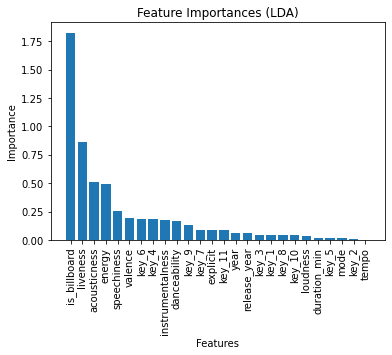

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate the features and the target variable
X = df34.drop('label', axis=1)
y = df34['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the data
lda.fit(X, y)

# Retrieve the coefficients (feature importances)
importance = np.abs(lda.coef_[0])

# Get the feature names
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plot the feature importances in descending order
plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (LDA)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


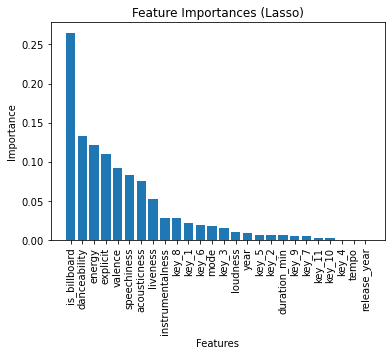

In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Separate the features and the target variable
X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Lasso container with reduced alpha
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

# Get importance scores (coefficients)
importance = np.abs(lasso.coef_)
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plot the feature importances in descending order
plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (Lasso)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


In [17]:
df50

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min,is_billboard,label
0,0.1450,2020,0.4010,0.731,0.5730,1,0.000052,0.1130,-10.059,0,...,0,0,0,0,0,0,0,3.418167,False,1
1,0.7560,2020,0.2210,0.700,0.7220,1,0.000000,0.2720,-3.558,0,...,0,0,1,0,0,0,0,2.342100,False,1
2,0.7370,2020,0.0112,0.746,0.7650,0,0.000000,0.0936,-4.410,0,...,0,1,0,0,0,0,0,3.317567,False,1
3,0.3570,2020,0.0194,0.935,0.4540,1,0.000000,0.0824,-7.509,1,...,0,0,0,0,0,0,0,3.125683,False,1
4,0.6820,2020,0.4680,0.737,0.8020,1,0.000000,0.0931,-4.771,1,...,0,0,0,0,0,0,0,2.872083,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.0696,1945,0.9920,0.224,0.0082,0,0.865000,0.0979,-31.113,1,...,0,1,0,0,0,0,0,1.690450,False,0
170649,0.4910,1945,0.1530,0.700,0.1760,1,0.000036,0.1050,-19.316,1,...,0,0,0,0,0,0,0,1.915000,False,0
170650,0.4440,1945,0.9770,0.517,0.2540,0,0.000189,0.2740,-9.750,1,...,0,0,0,0,0,0,0,2.848500,False,0
170651,0.6120,1945,0.1610,0.699,0.2380,1,0.000000,0.1070,-20.042,0,...,1,0,0,0,0,0,0,1.762967,False,0


In [44]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Convert 'release_date' feature to float
#df50['release_date'] = pd.to_numeric(df1['release_date'], errors='coerce')

# Fill missing values with the mean of the column
#df50['release_date'].fillna(df1['release_date'].mean(), inplace=True)

# Separate the features and the target variable
X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X, y)

# Retrieve the feature importances
importance_scores = rf_model.feature_importances_

# Print the importance scores for each feature
for feature, score in zip(X.columns, importance_scores):
    print(f'{feature}: {score}')

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the top 5 most important features
print("\nTop 5 Most Important Features:")
print(importance_df.head(5))

# Print the 5 least important features
print("\n5 Least Important Features:")
print(importance_df.tail(5))

valence: 0.04628935503218445
year: 0.22593696979258004
acousticness: 0.047847406513014494
danceability: 0.04904438840347737
energy: 0.04480554528502603
explicit: 0.0028098405282978504
instrumentalness: 0.03697465248935584
liveness: 0.048558823395319355
loudness: 0.05151991515127447
mode: 0.004635936569220968
speechiness: 0.049626181443183814
tempo: 0.051662364030324766
release_year: 0.2288223864544258
key_1: 0.0033828699295126515
key_2: 0.003927035461075827
key_3: 0.002456847944949641
key_4: 0.0037473702404354717
key_5: 0.003510556340940894
key_6: 0.0030154348730925405
key_7: 0.003971692360073536
key_8: 0.003432492482065189
key_9: 0.003984900021667208
key_10: 0.003193379251040666
key_11: 0.003283169099030729
duration_min: 0.05574053351792518
is_billboard: 0.017819953390505218

Top 5 Most Important Features:
         Feature  Importance
12  release_year    0.228822
1           year    0.225937
24  duration_min    0.055741
11         tempo    0.051662
8       loudness    0.051520

5 Leas

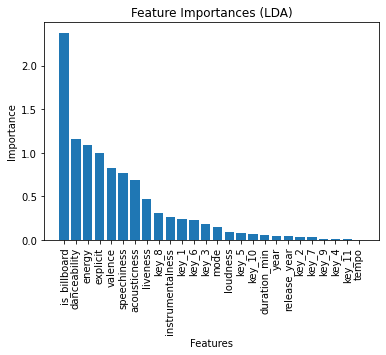

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate the features and the target variable
X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the data
lda.fit(X, y)

# Retrieve the coefficients (feature importances)
importance = np.abs(lda.coef_[0])

# Get the feature names
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plot the feature importances in descending order
plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (LDA)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

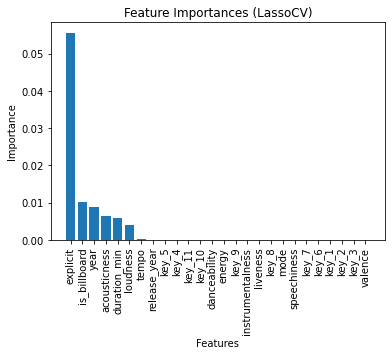

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

importance = np.abs(lasso_cv.coef_)
feature_names = X.columns

indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (LassoCV)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()
